# Example 3: Visualizing your metadata

This example introduces you to some of the `MetaViz` plotting routines, using the search functions explained in [Example 2](https://github.com/wrightky/MetaViz/blob/main/examples/2_Searching.ipynb). Given the number of plotting functions, this will merely be an overview of a few key examples.

_Note: throughout this example, the code is written to correctly output the figures, but we use IPython's Image to display photos from the example gallery where the real photos would be instead. Ignore those commands._

In [1]:
import MetaViz as mv
album = mv.Archive()

# Only here to display images from gallery folder, not needed to actually run codes:
import os
os.chdir('MetaViz/gallery')
from IPython.display import Image

## Finally, some figures!

The core of MetaViz is visualization -- helping you understand or communicate the underlying global structure of the data in your `Archive`. We've broken the types of figures you may be interested in creating into several categories based on the kind of information they convey. These categories (whose names correspond to the scripts in which they are stored) are as follows.

## Image Viewing

Functions to simply display the images in your `Archive` inside Python. If you're performing complex searches like in [Example 2](https://github.com/wrightky/MetaViz/blob/main/examples/2_Searching.ipynb), it can be helpful to have functions to quickly show you which files are showing up in your lists, without having to go look for them in the directory. 

In [ ]:
# Display the first photo in the collection located in Paris
# Note that we want the full path:
FileNames = album.FindSource(['Paris'],['Coverage'],withPath=True)

mv.ShowImage(FileNames[0],showTitle=False)

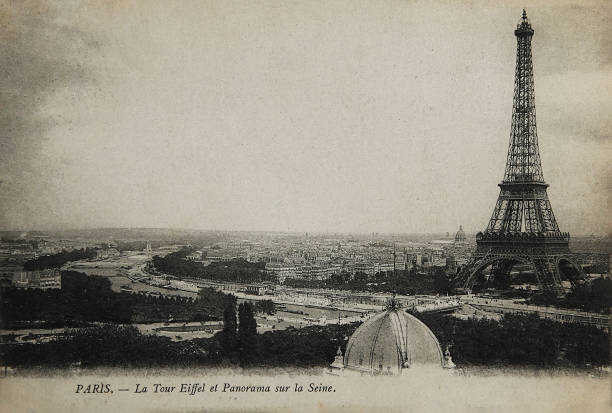

In [2]:
Image(filename='StockPhoto.jpg') # Display

## Statistics

Functions to show you bulk statistics of your `Archive`. This is where you'll find most of your histograms. For example, let's see how many of each filetype we have in the whole collection:

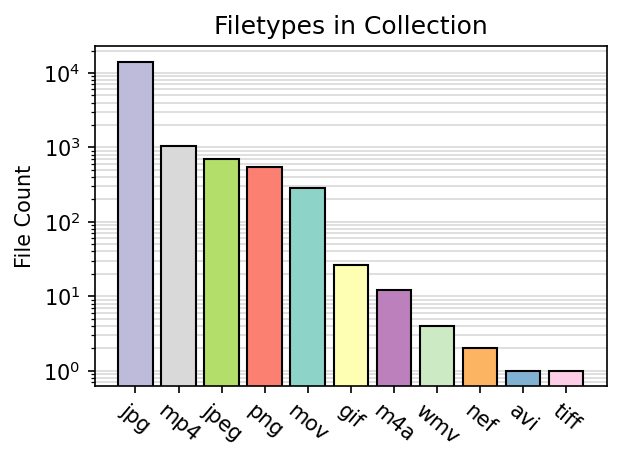

In [2]:
# Note that this function can also work on a subset of the collection
mv.FileTypes(album)

We can also visualize lots of temporal statistics, about the year or time of year our photos are dated. These plots can be accessed indivually or all at once, as follows.

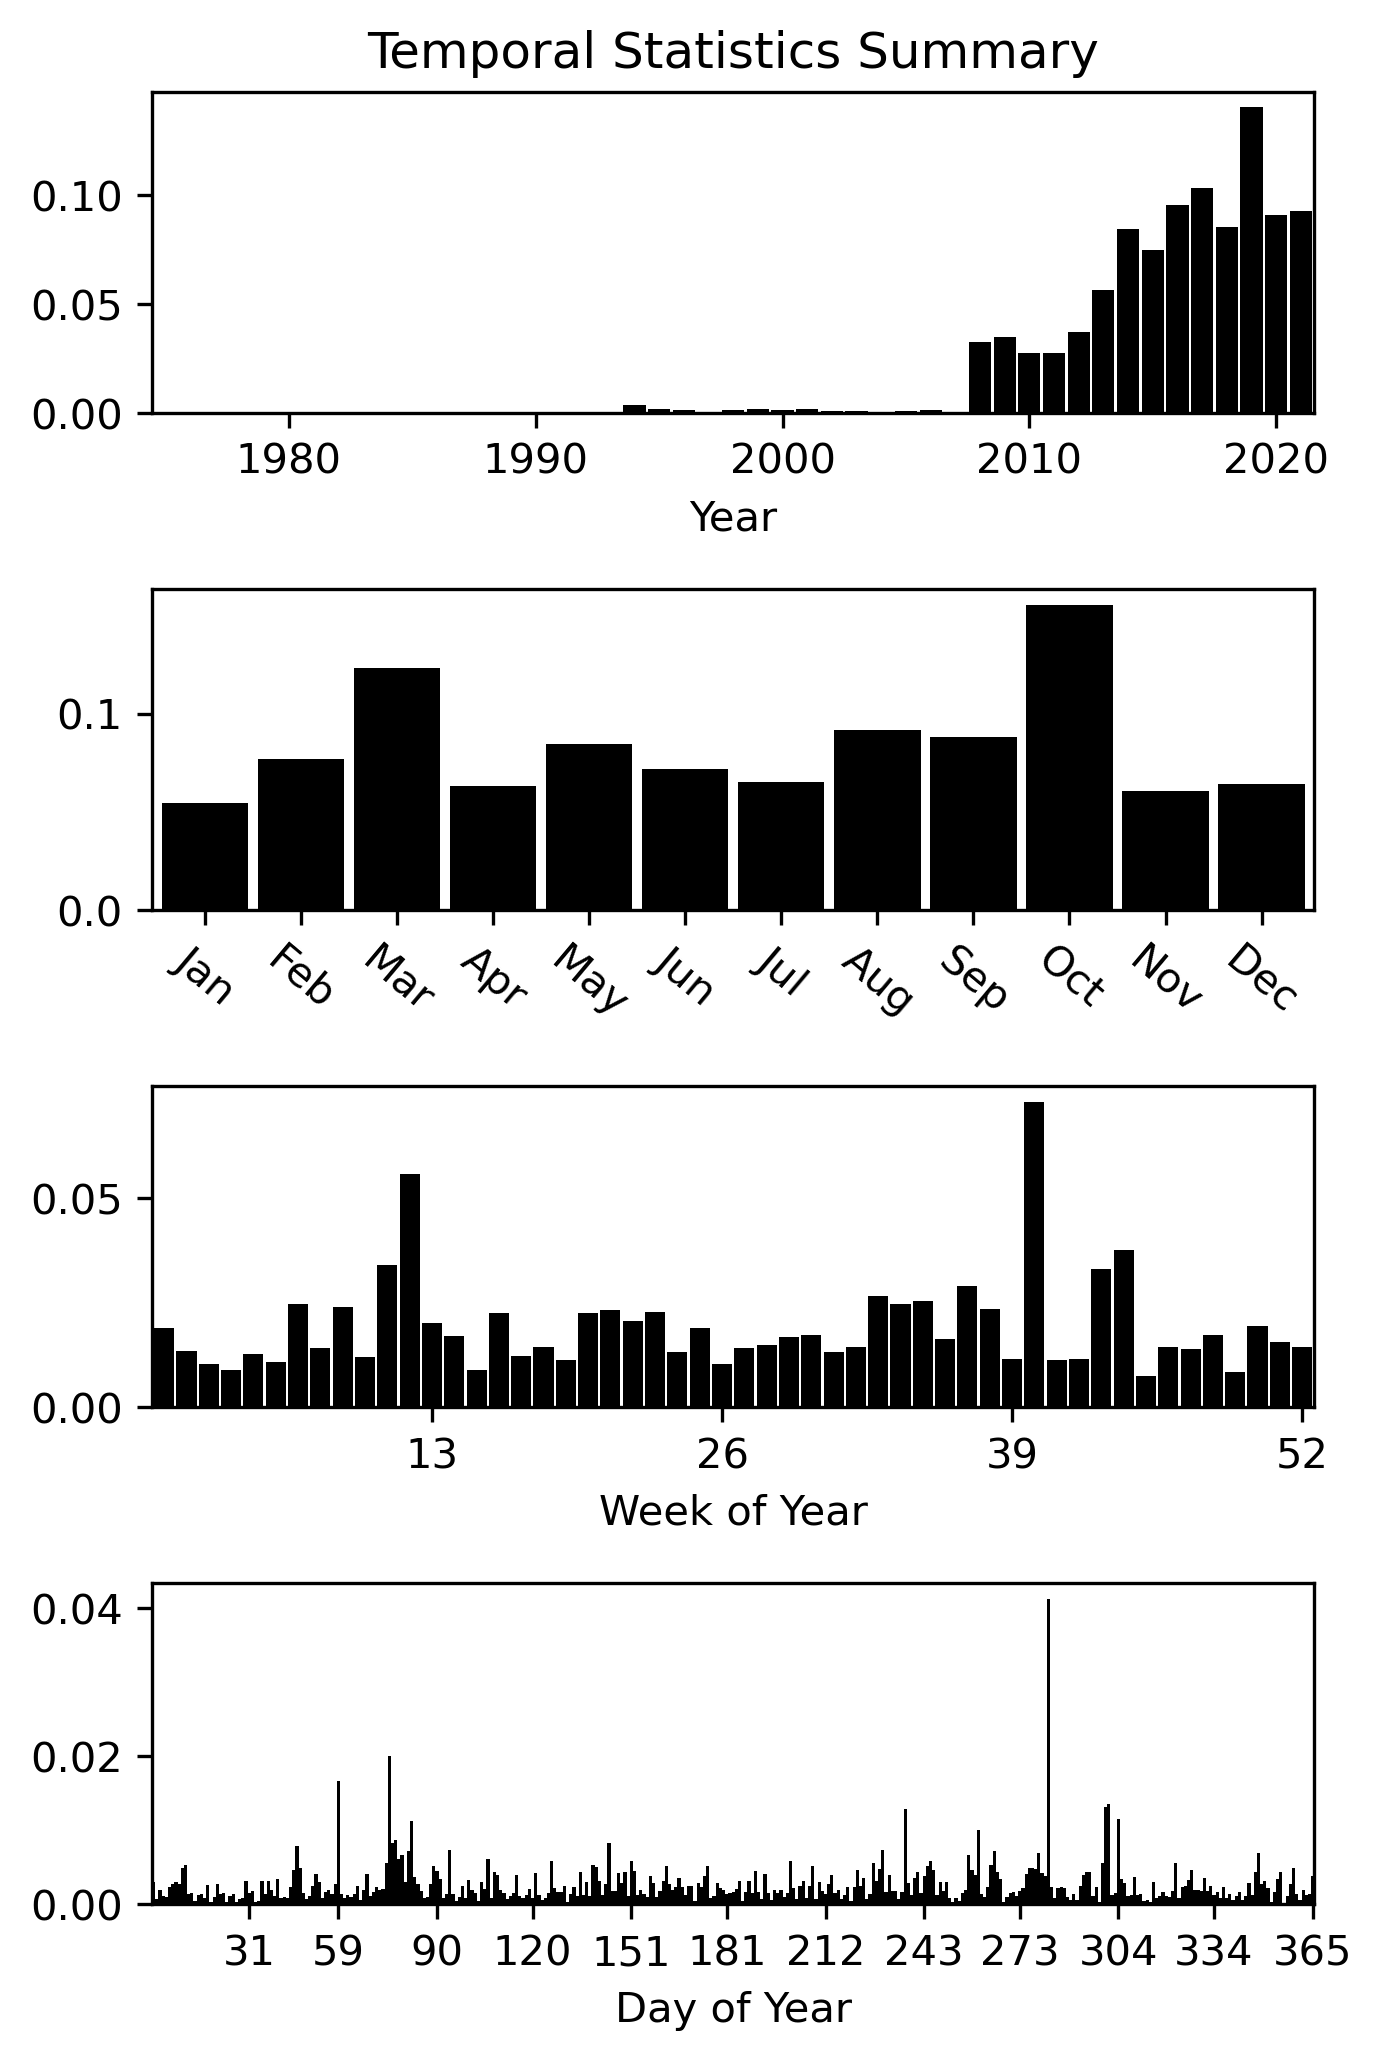

In [13]:
# Grab the creation dates for the files
df = album.GrabData(fields=['CreateDate'])

mv.TemporalStats(df)

## Time-Series

Speaking of temporal information, there are many routines for plotting changes through time. Perhaps we want to compare the relative abundance of a few specific keywords (e.g. people, locations) in our collection through time.

In [ ]:
# Let's compare the abundance of different animals showing up in subject keywords
values = ['Dog','Cat','Bird','Rabbit']
fields = ['Subject']

# Size of circles equates to number of entries that day
mv.OccuranceMagnitude(album, values, fields, scale=15)

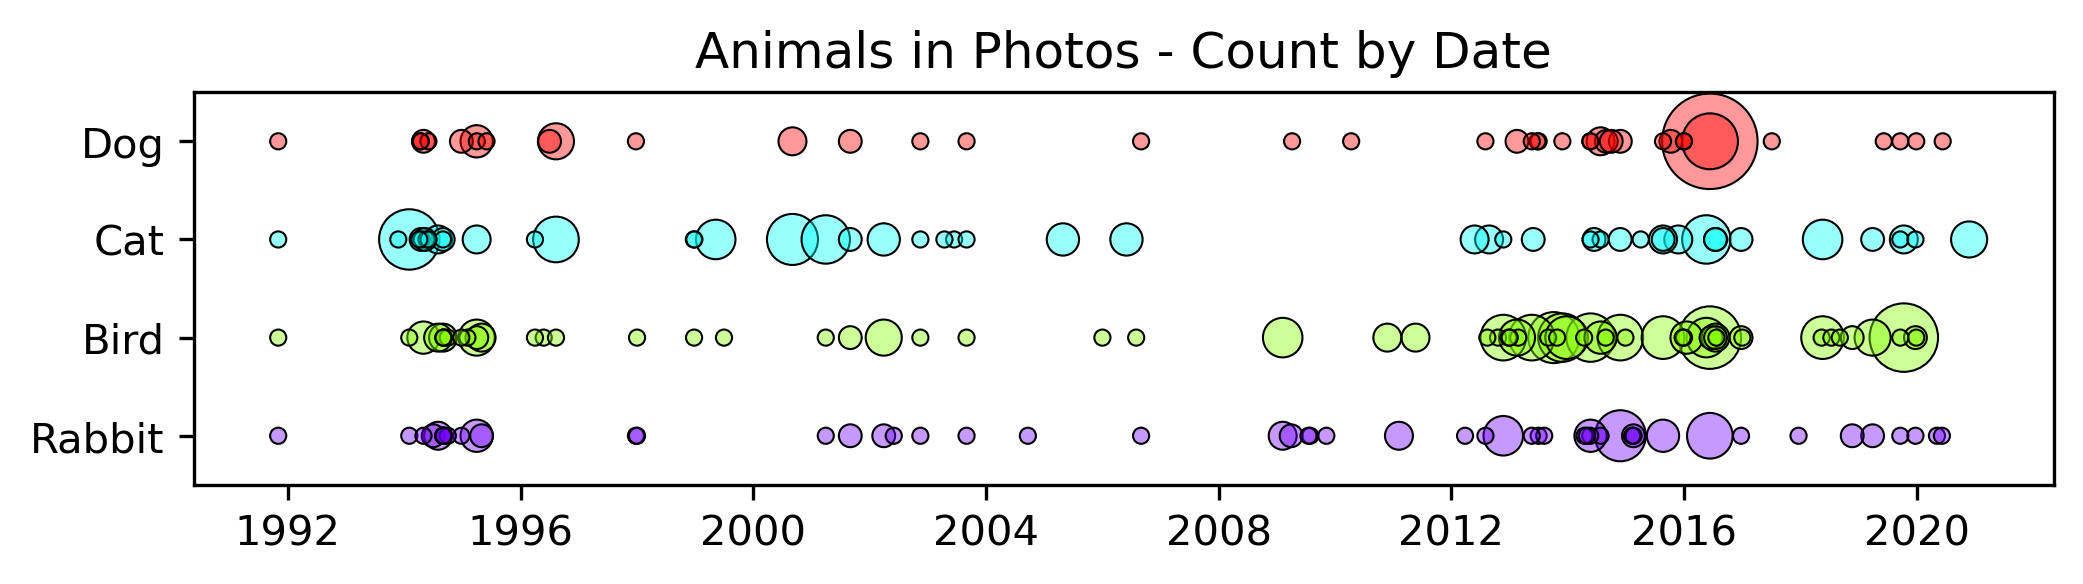

In [15]:
Image(filename='OccuranceMagnitude.png') # Display

Let's try one of the non-matplotlib based ones. Seaborn offers a very nice `ViolinPlot` in the following example.

In [ ]:
# Relative abundance of different American car brands in collection through time
terms = ['Ford','GM','Chrysler','Rolls-Royce','Cadillac','Chevrolet']
fields = ['Subject']

# Width of violin corresponds to number of entries at that time
mv.ViolinPlot(album, terms, fields)

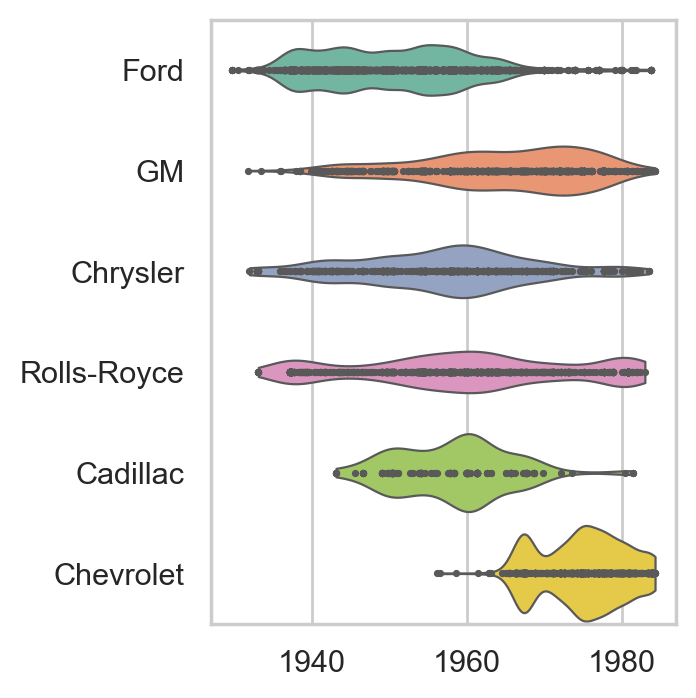

In [16]:
Image(filename='ViolinPlot.png') # Display

## Magnitudes

Perhaps we don't care about time, we just want to compare the abundance of different keywords in total, throughout either the whole collection or a specific subset of the collection. Which keywords show up the most?

In the example below, I scanned my personal photo collection to see which music venues I most frequently tagged in my `Coverage` field. Note the more sophisticated search I used to get to the final product. First, I find photos containing "bands". Then I find the location for those photos. Then I count the number of times each unique keyword showed up. Then plot.

In [ ]:
N = 20 # Number of entries to show

# Find all photos in which I tagged a band
bandlist = album.FindSource(['Band'], ['Subject'])
# Grab the Coverage locations for those photos
data = album.GrabData(bandlist, fields=['Coverage'])
# Then, count how often each entry appeared
data = mv.CountUnique(data['Coverage'], delimiter=', ')

# Plot as a bar chart
mv.BarChart(data, N)

# Finally, adjust the plot to give it a better title
ax = plt.gca()
ax.set_title('Most Frequented Music Venues')

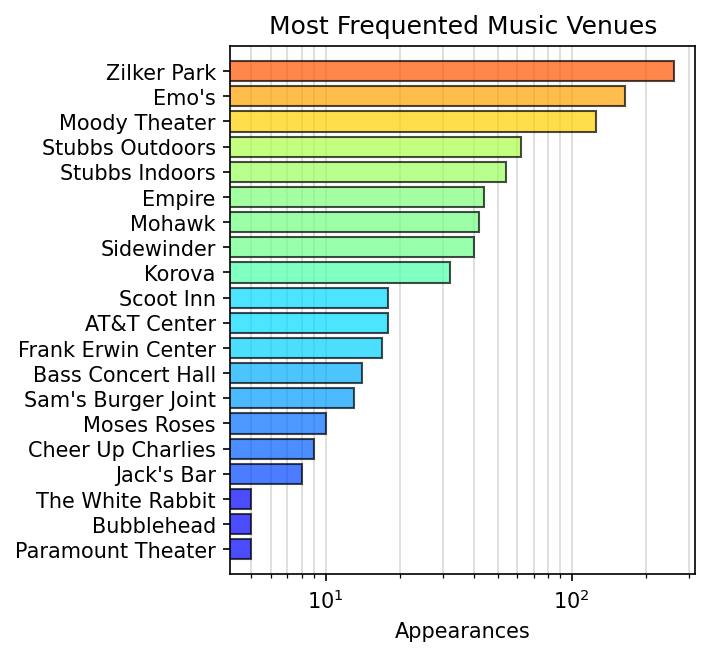

In [17]:
Image(filename='BarChart.png') # Display

Note the last two lines in this example. For matplotlib-based functions, you can always edit the resulting figure by calling the figure axes using `ax = plt.gca()` and then editing the axes objects. 

## Connections

Perhaps instead of visualizing keywords in competition with each other, you want to visualize the connections between them. How often do keywords appear together, either within the same field, or between different ones? What fraction of photos containing _Person A_ also contain _Person B_? What fraction of photos containing _Person A_ were taken in _Place C_ or by _Photographer D_?

In this example, we see how often the ten most common people in the collection are associated with the 15 most common locations:

In [ ]:
# Plot correlation between Subject (x) and Coverage (y)
mv.Heatmap2(album, 'Subject', 'Coverage', N_x=10, N_y=15)

ax = plt.gca()
ax.set_title('Correlation (XMP Subject vs Coverage)')

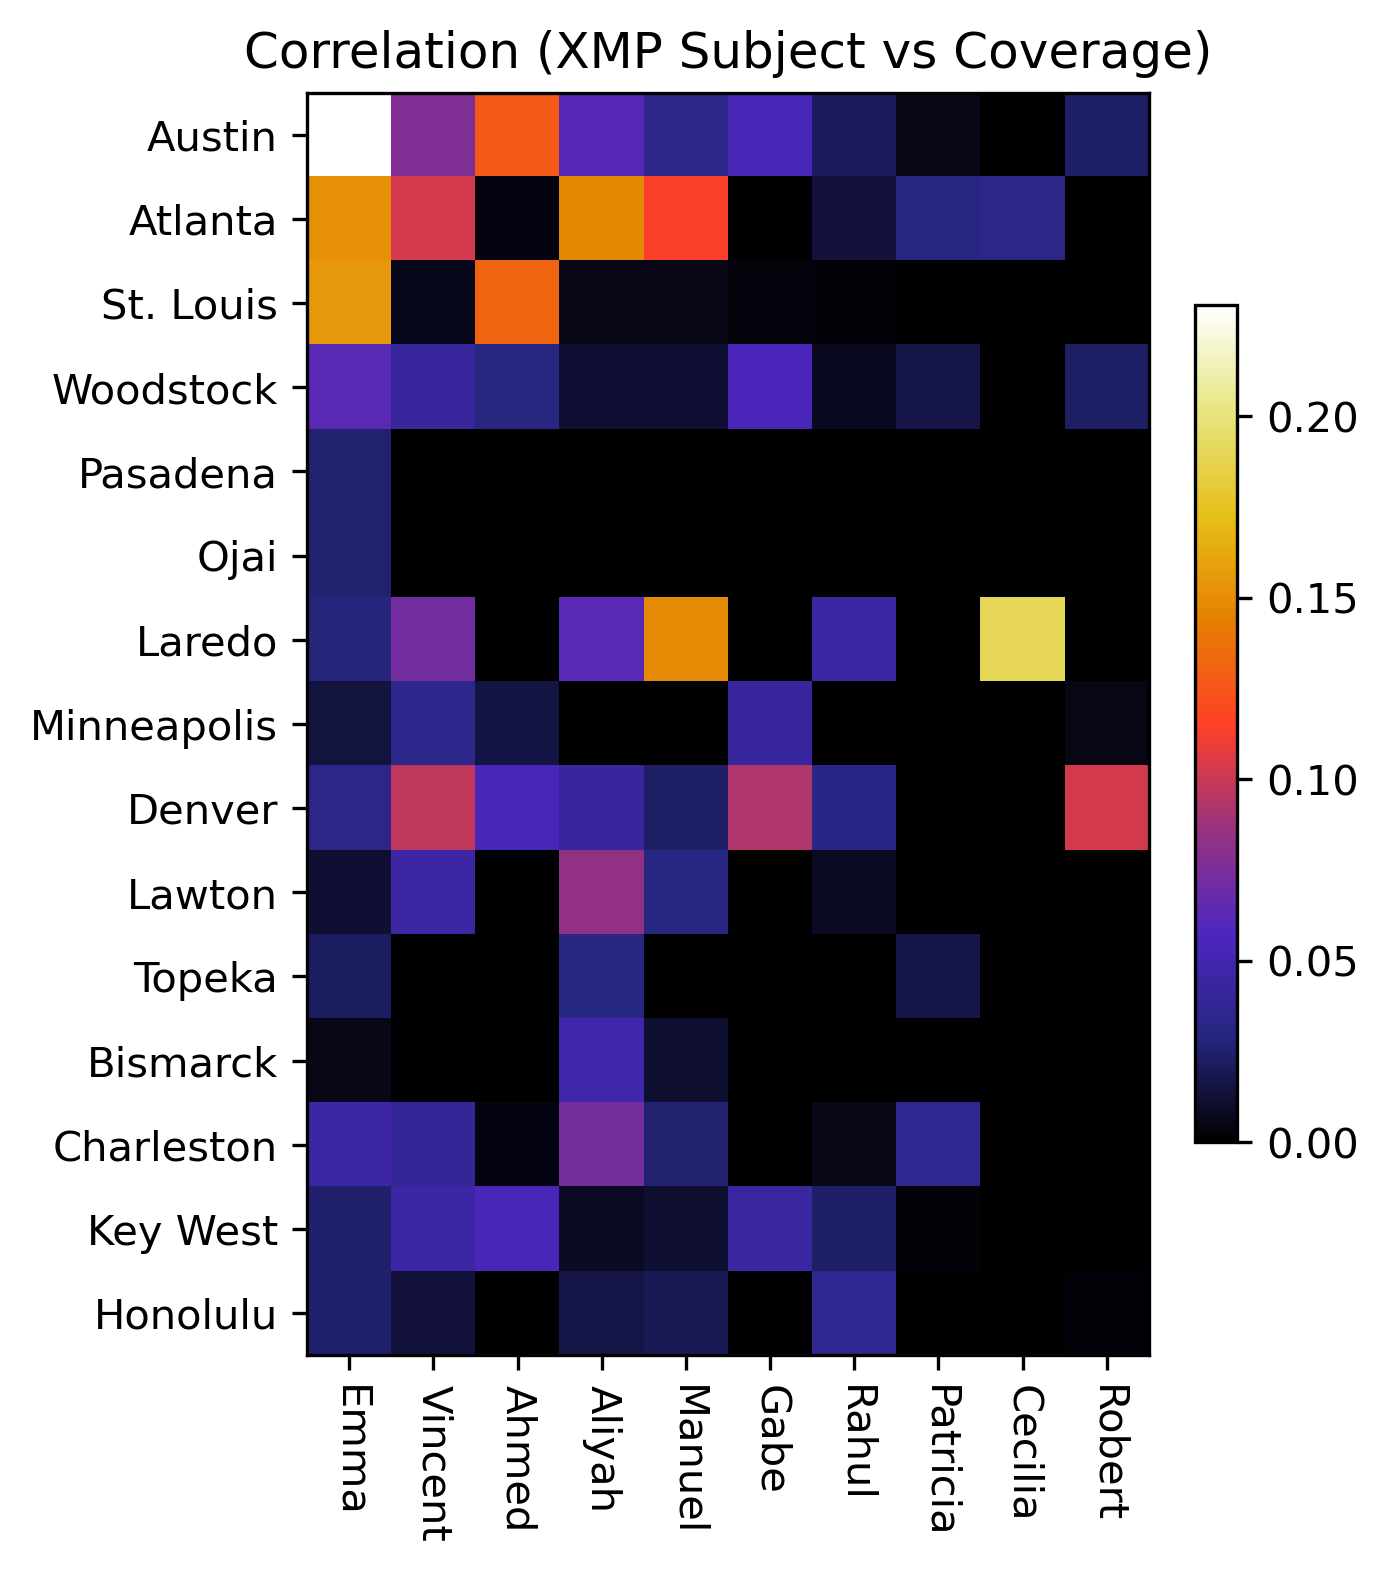

In [18]:
Image(filename='Heatmap2.png') # Display

Within a given field, we can create a similar heatmap using `Heatmap1` instead of `Heatmap2`, or we could try out another tertiary package and make a nice `ChordChart`. Note that this package primarily works inside `Jupyter Lab` (and in real code, it's interactive! Not here though, this is a screenshot.)

Maybe we have a collection of scanned letters, and we want to see how often there was correspondance between select people:

In [ ]:
# Chord diagram (Only works in JupyterLab)
names = ['Fermi','Bohr','Oppenheimer','Neumann','Meitner','Woods']
fields = ['Subject'] # Fields to search through

mv.ChordChart(album, names, fields)

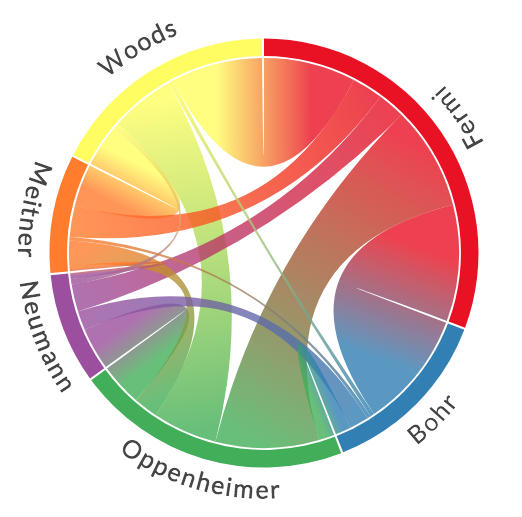

In [20]:
Image(filename='ChordChart.png') # Display

## Geospatial

Currently working on this. Will build a full example 4 for it once these codes are ready.

## Get Plotting!

For more example outputs, see the full [gallery](https://github.com/wrightky/MetaViz/tree/main/gallery) folder. Otherwise, explore, try things out, see how they work!